# 1. Perkenalan
- Nama   : Muhammad Julizar
- Batch  : FTDS-RMT-016


### Dataset      : Telco Customer Churn
### Objective    : Membuat model Artifical Neural Network terbaik untuk melakukan prediksi Customer Churn pada perusahaan telco

# 2. Import Library

In [66]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import joblib

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from imblearn.over_sampling import SMOTE

# Modelling
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, concatenate, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix


pd.options.display.max_columns = None

# 3. Data Loading

In [3]:
# Load Data
df = pd.read_csv('D:\Hacktiv 8\Full time Data Science\Phase 2\Milestone\Milestone1\Telco Customer Churn.csv')

In [4]:
# See top 10 Data
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
# See the last 5 data
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
# Info Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dapat dilihat bahwa data memiliki 7043 Baris dan 21 kolom.
Semua data tidak terlihat ada missing value, namun terdapat keanehan pada kolom `TotalCharges` dalam data kolom tersebut berisi angka namun tipe data nya adalah `object`, hal tersebut merupakan sebuah kesalahan tipe data sehingga harus di ubah tipe datanya menjadi `float`

In [7]:
# Melihat central tendency Data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# 4. Exploratory Data Analysis (EDA)

In [8]:
# Change data types
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].dtype

dtype('float64')

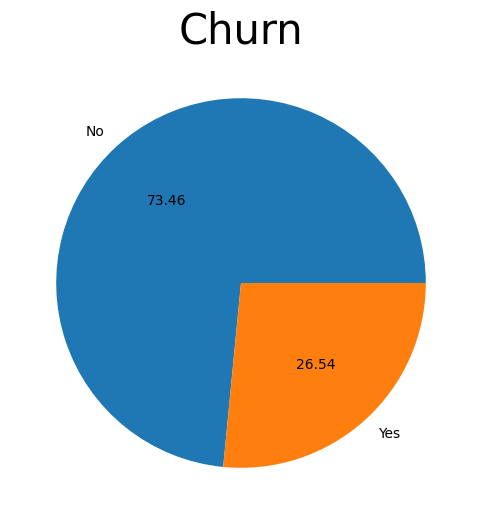

In [9]:
# Pie Plot column churn
plt.figure(figsize=(8,6))
plt.pie(df['Churn'].value_counts(), labels=df['Churn'].unique(), autopct='%.2f')
plt.title('Churn', fontsize=30)
plt.show()

Dari data diatas dapat kita lihat bahwa kolom yang akan kita jadikan target datanya sangat imbalanced.

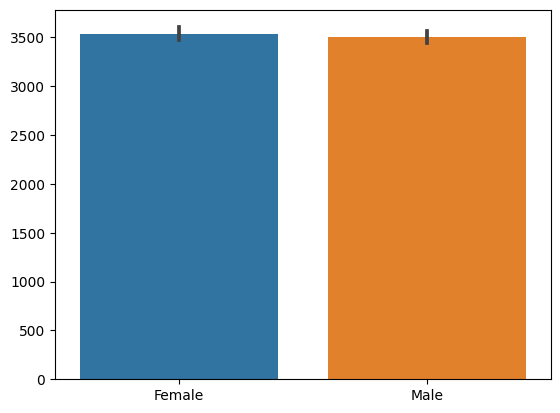

In [10]:
# See gender barplot
sns.barplot(df, y=df['gender'].index, x=df['gender'].values)
plt.show()

Pada data gender dapat kita lihat bahwa jumlah laki-laki dan perempuan pada customer Telco memiliki jumlah yang hampir sama

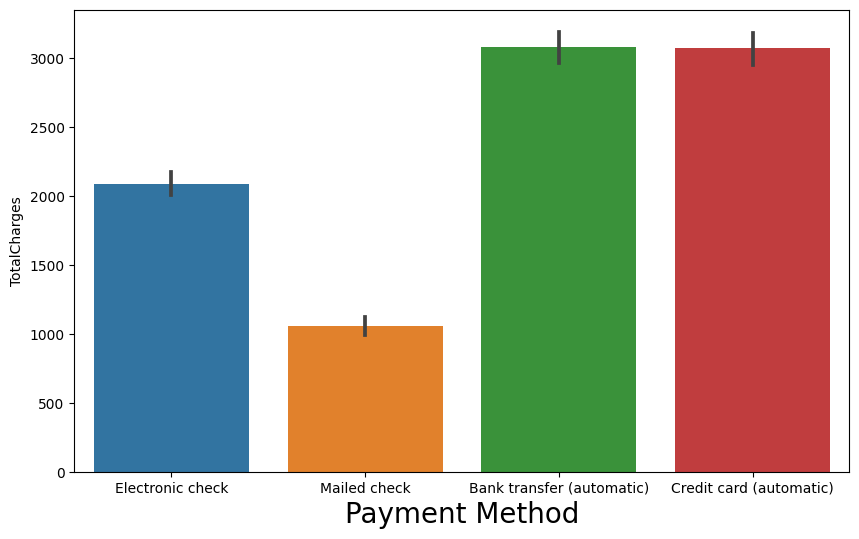

In [11]:
# Barplot Payment Method
plt.figure(figsize=(10,6))
sns.barplot(df, x=df['PaymentMethod'], y=df['TotalCharges'])
plt.xlabel('Payment Method', fontsize=20)
plt.show()

Terdapat 4 metode pembayaran yaitu Electronic Check, Mailed check, bank transfer, credit card, dari ke 4 metode tersebut credit card dan bank transfer adalah 2 metode yang paling banyak digunakan sehingga memiliki jumlah `TotalCharges`paling tinggi dibandingkan electronic dan mailed check

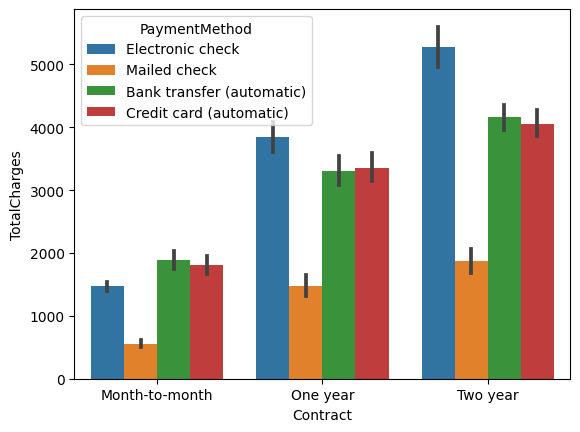

In [12]:
# Barplot contract
sns.barplot(df, x=df['Contract'], y=df['TotalCharges'], hue='PaymentMethod')
plt.show()

Dari 3 jenis contract, two year memiliki totalCharges paling besar, dengan metode pembayaran electronic Check, dan Contract month-to-month memiliki nilai TotalCharges paling sedikit

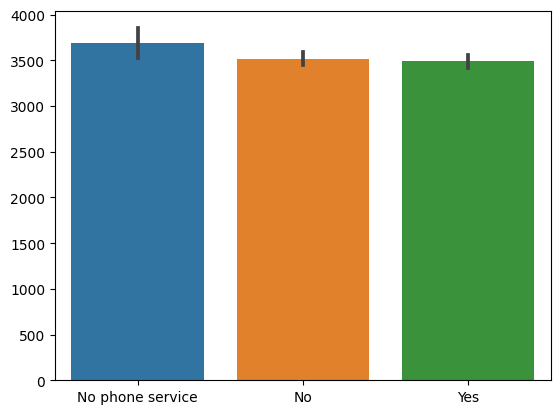

In [13]:
sns.barplot(df, x=df['MultipleLines'].values, y=df['MultipleLines'].index)
plt.show()

Terdapat 3 jenis langganan, yaitu multiple lines, tidak multiple lines dan multiple lines tanpa phone service, dari ketiga jenis tersebut yang paling banyak dipilih oleh customer adalah multiple lines tanpa phone service

In [14]:
# Select numeric column
num_column = ['tenure', 'MonthlyCharges', 'TotalCharges']

Memilih kolom numeric untuk melihat ploting distribusi dan outlier

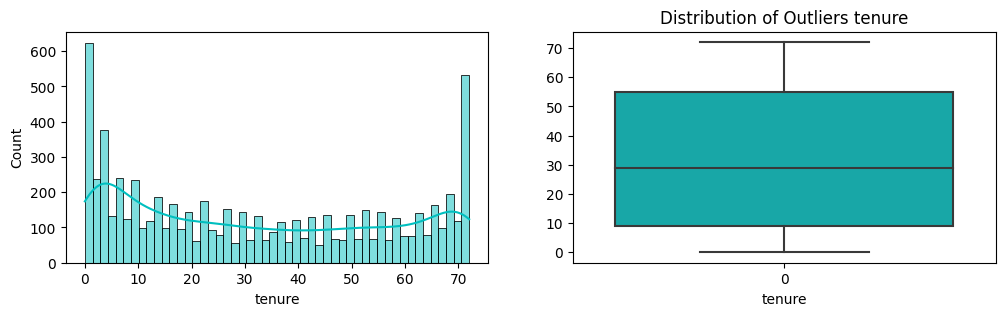

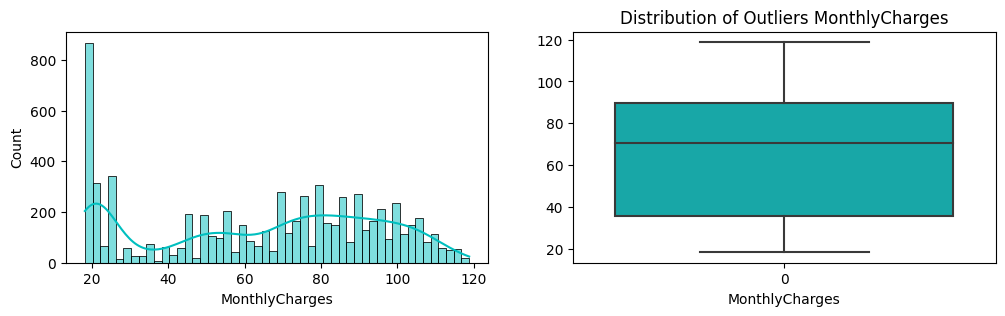

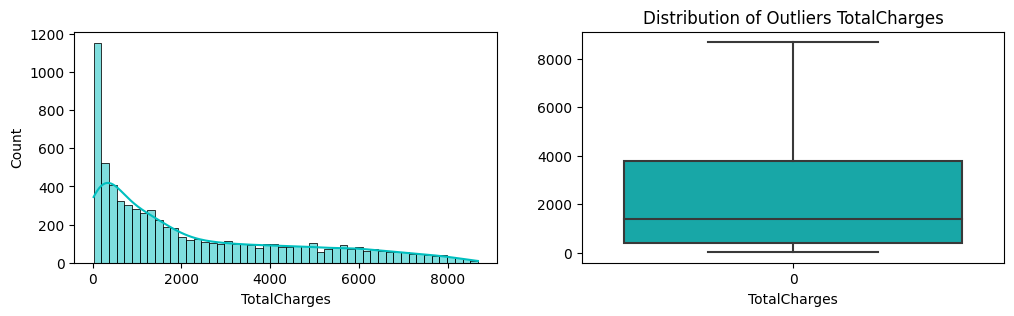

In [15]:
## Plot to see distribution of data
for i in num_column:
    fig, axs = plt.subplots(1,2,figsize=(12, 3))
    plt.title(f'Distribution of Outliers {i}')
    sns.histplot(df[i], bins=50, kde=True, ax=axs[0], color='c')
    sns.boxplot(df[i], ax=axs[1], color='c')
    plt.xlabel(i)

In [16]:
# Skewness score
for j in num_column:
    print(f'Nilai skewness {j}: {df[j].skew()}')

Nilai skewness tenure: 0.2395397495619829
Nilai skewness MonthlyCharges: -0.22052443394398033
Nilai skewness TotalCharges: 0.961642499724251


Pada kolom numeric di data set ini, tidak terdapat outlier sehingga data aman digunakan, namun distribusi TotalCharges sedikit skewed jika dilihat dari nilai skewness

# 5. Data Preprocessing

In [17]:
# drop column
df = df.drop('customerID', axis=1)

Menurut pengamatan saya sendiri kolom customerID tidak memiliki korelasi sama sekali terhadap kemungkinan customer utk meninggalkan langganan/Churn

In [18]:
# check top 5 from data set
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 5.1 Split Data

In [19]:
# Split 50 data inference
data_inf = df.sample(50, random_state=19)
data_train_test = df.drop(data_inf.index)

data_inf.reset_index(drop=True, inplace=True)
data_train_test.reset_index(drop=True, inplace=True)

In [20]:
# Split feature and target
X = data_train_test.drop('Churn', axis=1)
y = data_train_test['Churn']

In [21]:
# Split train, val and test data
X_train_val,X_test, y_train_val,y_test = train_test_split(X,y, test_size=0.2, random_state=19)
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val, test_size=0.2, random_state=19)

print('Train_size :', X_train.shape)
print('Test_size :', X_test.shape)
print('Val_size :', X_val.shape)

Train_size : (4475, 19)
Test_size : (1399, 19)
Val_size : (1119, 19)


## 5.2 Feature Engineering

In [22]:
# Select column numeric and categorical
cat_column = X.drop(num_column, axis=1).columns.to_list()
print(cat_column)
print(num_column)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
['tenure', 'MonthlyCharges', 'TotalCharges']


In [23]:
# make pipeline
num_pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
cat_pipeline = make_pipeline(OrdinalEncoder())

# Column transformer, scalling and encoding for hypotesis testing
feature_selection_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_column),
    ('pipe_cat', cat_pipeline, cat_column),
])

X_feature_selection = feature_selection_pipeline.fit_transform(X_train)
X_feature_selection_df = pd.DataFrame(X_feature_selection, columns=[num_column + cat_column])


In [24]:
# make new variable for anova test and chi square test
X_for_anova = X_feature_selection_df[num_column]
X_for_chi2 = X_feature_selection_df[cat_column]

### 5.2.1 Anova

#### Hypotesis test <br> P-value >= 0.05 == drop feature <br>p-value < 0.05 == use feature

In [25]:
#ANOVA
anova = SelectKBest(score_func=f_classif, k=3)
anova.fit_transform(X_for_anova,y_train)

pd.DataFrame({'Anova_F_value' : anova.scores_, 'P_values' :anova.pvalues_}, index=X_for_anova.columns)



,Anova_F_value,P_values
tenure,608.361508,4.750854e-126
MonthlyCharges,180.275446,2.524172e-40
TotalCharges,174.989060,3.253442e-39


Pada test anova, semua kolom memiliki nilai P_value < 0.05 Sehingga semua feature akan digunakan dan tidak ada kolom yang dihapus.

### 5.2.2 Chi Square

#### Hypotesis test <br> P-value >= 0.05 == drop feature <br>p-value < 0.05 == use feature

In [26]:
# Feature selection using chi square
chi_square = SelectKBest(score_func=chi2, k=16)
chi_square.fit_transform(X_for_chi2,y_train)

chi = pd.DataFrame({'Score' : chi_square.scores_, 'P_values' :chi_square.pvalues_}, index=X_for_chi2.columns)
chi.sort_values(by='P_values',ascending=False)


,Score,P_values
gender,0.026905,8.697090e-01
PhoneService,0.151000,6.975815e-01
StreamingTV,2.620099,1.055179e-01
StreamingMovies,3.649987,5.606966e-02
MultipleLines,3.964078,4.648097e-02
InternetService,5.978467,1.448158e-02
PaymentMethod,42.772106,6.150291e-11
Partner,46.530061,9.022363e-12
PaperlessBilling,58.670813,1.863860e-14
Dependents,71.009810,3.554531e-17


Dari hasil test using Chi Square terdapat beberapa kolom yang memiliki pvalue > 0.05 atau bisa dikatakan tidak memilki keterkatian terhadap target (`Churn`).<br>
Kolom tersebut adalah `'gender', 'PhoneService', 'StreamingTV', 'StreamingMovies'` Sehingga perlu di drop sebelum dimasukkan kedalam Model

In [27]:
# Select columns
cat_cols = ['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod']
num_cols_normal = ['tenure', 'MonthlyCharges']
num_cols_abnormal = ['TotalCharges']

### 5.2.3 Column Transformer

In [28]:
# Mapping Target
y_train = y_train.map({'Yes':1, 'No': 0})
y_val = y_val.map({'Yes': 1, 'No': 0})
y_test = y_test.map({'Yes': 1, 'No': 0})

Merubah value `Yes dan No` Menjadi angka `1 dan 0`

In [29]:
# Pipeline for Scalling and encoding 
num_pipeline_normal = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OrdinalEncoder())
num_pipeline_abnormal = make_pipeline(SimpleImputer(strategy='median'),MinMaxScaler())


final_pipeline = ColumnTransformer([
    ('pipe_num_normal', num_pipeline_normal, num_cols_normal),
    ('pipe_num_abnormal',num_pipeline_abnormal, num_cols_abnormal),
    ('pipe_cat', cat_pipeline, cat_cols)
])

Setelah dibuat pipeline dilakukan transform menggunakan pipeline pada data train, val, test

In [30]:
# Transform all data, Train, val, test
X_train =  final_pipeline.fit_transform(X_train)
X_val = final_pipeline.fit_transform(X_val)
X_test = final_pipeline.fit_transform(X_test)
X_train.shape

(4475, 15)

In [31]:
# Count value in train, val, test target
print(y_train.value_counts())
print(y_val.value_counts())
print(y_test.value_counts())

0    3331
1    1144
Name: Churn, dtype: int64
0    798
1    321
Name: Churn, dtype: int64
0    1013
1     386
Name: Churn, dtype: int64


Data diatas menunjukkan bahwa ketiga dataset memiliki karakteristik yang imbalance maka perlu kita lakukan balance pada data train

### 5.2.4 Over Sampling

In [32]:
# Over sampling data train
X_train_resampled, y_train_resampled = SMOTE(sampling_strategy='minority').fit_resample(X_train, y_train)

In [33]:
# Melihat data setelah di lakukan over sampling
print(y_train_resampled.value_counts())
print(y_val.value_counts())
print(y_test.value_counts())

1    3331
0    3331
Name: Churn, dtype: int64
0    798
1    321
Name: Churn, dtype: int64
0    1013
1     386
Name: Churn, dtype: int64


Data pada train, sudah imbalance setelah dilakukan SMOTE 

## 5.3 Input Pipeline (Tensorflow)

In [34]:
# Input pipelin in train, val and test data
pipe_train = tf.data.Dataset.from_tensor_slices((X_train_resampled,y_train_resampled)).batch(256).repeat(2).shuffle(100)
pipe_val = tf.data.Dataset.from_tensor_slices((X_val,y_val)).batch(64)
pipe_test = tf.data.Dataset.from_tensor_slices((X_test,y_test)).batch(64)

# 6. Model Definition (Sequential & Functional)

### 6.1 Sequential API

In [35]:
# Define sequential base model
model_seq = Sequential()
model_seq.add(Dense(64, input_shape=(15,))) 
model_seq.add(Dense(32, ))
model_seq.add(Dense(16, ))
model_seq.add(Dense(1, activation='sigmoid')) 

# compile
model_seq.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1024      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,649
Trainable params: 3,649
Non-trainable params: 0
_________________________________________________________________


### 6.2 Functional API

In [36]:
# Define functional base model
input_layer = Input(shape=(15,))
hidden1_layer = Dense(32, )(input_layer)
hidden2_layer = Dense(16, )(hidden1_layer)


concat_layer = concatenate([input_layer, hidden2_layer])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

mod_func = Model(inputs=input_layer, outputs=output_layer)

# compile
mod_func.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['accuracy'])

mod_func.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 15)]         0           []                               
                                                                                                  
 dense_4 (Dense)                (None, 32)           512         ['input_1[0][0]']                
                                                                                                  
 dense_5 (Dense)                (None, 16)           528         ['dense_4[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 31)           0           ['input_1[0][0]',                
                                                                  'dense_5[0][0]']            

# 7. Model Training

### 7.1 Sequential

In [37]:
# Training model sequential dengan epochs 20
history1 = model_seq.fit(pipe_train,
                        epochs=20,
                        validation_data=pipe_val)

Epoch 1/20
54/54 [==============================] - 2s 8ms/step - loss: 0.5497 - accuracy: 0.7370 - val_loss: 0.9166 - val_accuracy: 0.5567
Epoch 2/20
54/54 [==============================] - 0s 3ms/step - loss: 0.5325 - accuracy: 0.7438 - val_loss: 0.5334 - val_accuracy: 0.7337
Epoch 3/20
54/54 [==============================] - 0s 3ms/step - loss: 0.5143 - accuracy: 0.7483 - val_loss: 0.5345 - val_accuracy: 0.7310
Epoch 4/20
54/54 [==============================] - 0s 4ms/step - loss: 0.5168 - accuracy: 0.7500 - val_loss: 0.4609 - val_accuracy: 0.7650
Epoch 5/20
54/54 [==============================] - 0s 4ms/step - loss: 0.5077 - accuracy: 0.7509 - val_loss: 0.5907 - val_accuracy: 0.6988
Epoch 6/20
54/54 [==============================] - 0s 3ms/step - loss: 0.5017 - accuracy: 0.7582 - val_loss: 0.5130 - val_accuracy: 0.7426
Epoch 7/20
54/54 [==============================] - 0s 4ms/step - loss: 0.5020 - accuracy: 0.7569 - val_loss: 0.4847 - val_accuracy: 0.7560
Epoch 8/20
54/54 [==

### 7.2 Functional

In [38]:
# Trainin model functional dengan epochs 20
history_func = mod_func.fit(pipe_train,
                            epochs=20,
                            validation_data=pipe_val)

Epoch 1/20
54/54 [==============================] - 2s 7ms/step - loss: 0.7108 - accuracy: 0.6364 - val_loss: 0.5105 - val_accuracy: 0.7444
Epoch 2/20
54/54 [==============================] - 0s 4ms/step - loss: 0.5091 - accuracy: 0.7496 - val_loss: 0.5172 - val_accuracy: 0.7364
Epoch 3/20
54/54 [==============================] - 0s 3ms/step - loss: 0.4923 - accuracy: 0.7639 - val_loss: 0.5712 - val_accuracy: 0.7158
Epoch 4/20
54/54 [==============================] - 0s 3ms/step - loss: 0.4958 - accuracy: 0.7607 - val_loss: 0.4785 - val_accuracy: 0.7659
Epoch 5/20
54/54 [==============================] - 0s 4ms/step - loss: 0.4864 - accuracy: 0.7650 - val_loss: 0.5097 - val_accuracy: 0.7489
Epoch 6/20
54/54 [==============================] - 0s 4ms/step - loss: 0.4905 - accuracy: 0.7630 - val_loss: 0.4671 - val_accuracy: 0.7676
Epoch 7/20
54/54 [==============================] - 0s 4ms/step - loss: 0.4909 - accuracy: 0.7625 - val_loss: 0.5011 - val_accuracy: 0.7516
Epoch 8/20
54/54 [==

# 8. Model Evaluation

### 8.1 Sequential

In [39]:
# membuat data frame dari hasil training model
history_seq_df = pd.DataFrame(history1.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.549697,0.737016,0.916605,0.556747
1,0.532496,0.743771,0.533391,0.733691
2,0.514331,0.748274,0.534497,0.731010
3,0.516779,0.750000,0.460885,0.764969
4,0.507720,0.750901,0.590694,0.698838
5,0.501706,0.758181,0.513010,0.742627
6,0.501982,0.756905,0.484705,0.756032
7,0.508421,0.751351,0.520060,0.739053
8,0.505324,0.754128,0.500343,0.751564
9,0.501698,0.756755,0.524417,0.738159


<AxesSubplot: >

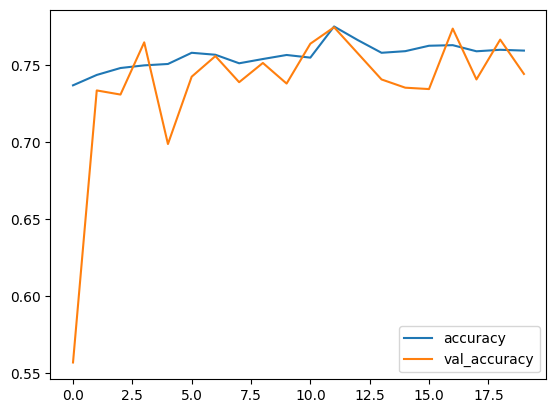

In [40]:
# ploting accuracy setelah di training (sequential model)
history_seq_df[['accuracy', 'val_accuracy']].plot()

<AxesSubplot: >

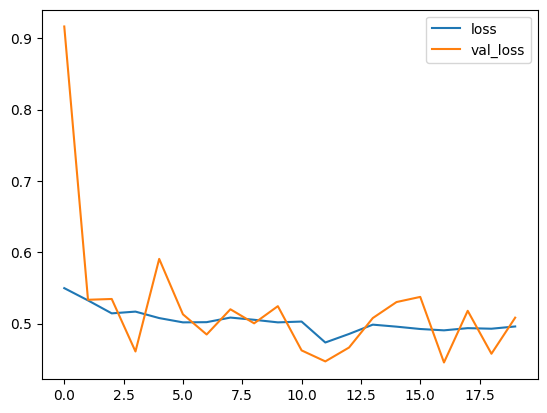

In [41]:
# plotting loss setelah di training (sequential model)
history_seq_df[['loss', 'val_loss']].plot()

Pada saat training hasil akurasi dan loss mengalami exploding gradient yang sangat extreme pada data val, hal ini disebabkan oleh data yang imbalance pada data validation nya, dan juga model belum dilakukan optimization sehingga masih terdapat problem exploding gradient

In [42]:
# predict test data
y_pred_seq = model_seq.predict(X_test)
y_pred_seq = np.where(y_pred_seq >=0.5, 1,  0)

# Classification report hasil predict dengan target actual
print(classification_report(y_test, y_pred_seq))

44/44 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1013
           1       0.51      0.81      0.63       386

    accuracy                           0.73      1399
   macro avg       0.71      0.76      0.71      1399
weighted avg       0.80      0.73      0.75      1399



Pada hasil prediksi menggunakan base model sequential pada data test dengan metrics classification report, model belum terlalu baik memprediksi class 0 dan class 1 hal ini ditunjukkan dengan hasil `f1 score` pada class 0 dan 1 masing masing adalah `0.78 dan 0.62` dengan accuracy yang hanya berada pada `0.72`. penyebab kurang baiknya dalam prediksi kali ini adalah base model yang digunakan tidak terdapat teknik optimization apapun

### 8.2 Functional

In [43]:
history_func_df = pd.DataFrame(history_func.history)
history_func_df

,loss,accuracy,val_loss,val_accuracy
0,0.710790,0.636446,0.510481,0.744415
1,0.509124,0.749625,0.517250,0.736372
2,0.492344,0.763885,0.571159,0.715818
3,0.495808,0.760657,0.478495,0.765862
4,0.486405,0.765011,0.509665,0.748883
5,0.490479,0.762984,0.467073,0.767650
6,0.490913,0.762534,0.501113,0.751564
7,0.493593,0.759982,0.497702,0.752458
8,0.494035,0.759382,0.491316,0.756032
9,0.484404,0.767862,0.476271,0.760500


<AxesSubplot: >

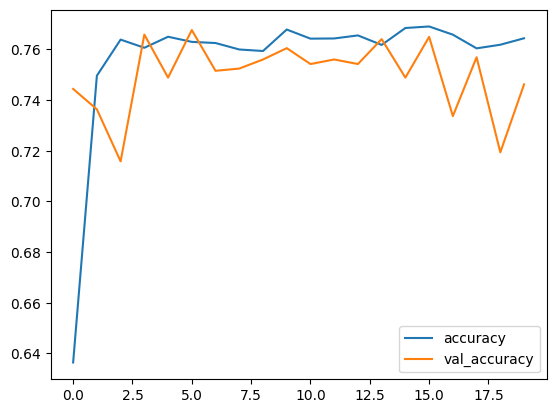

In [44]:
history_func_df[['accuracy', 'val_accuracy']].plot()

<AxesSubplot: >

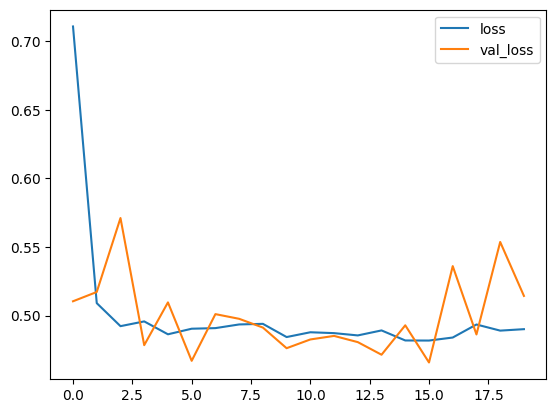

In [45]:
history_func_df[['loss', 'val_loss']].plot()

Hasil training pada model functional Sama hal nya seperti yang terjadi pada base model sequential, dapat dilihat dari kedua grafik `accuracy dan loss` bahwa terdapat problem exploding gradient namun tidak se-extreme pada sequential model

In [46]:
y_pred_func = mod_func.predict(X_test)
y_pred_func = np.where(y_pred_func > 0.5,1 ,0)


print(classification_report(y_test, y_pred_func))

44/44 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1013
           1       0.51      0.80      0.62       386

    accuracy                           0.73      1399
   macro avg       0.70      0.75      0.70      1399
weighted avg       0.79      0.73      0.74      1399



Pada hasil prediksi menggunakan base functional model, dapat dilihat bahwa accuracy yang didapatkan lebih baik `3%` dibandingkan yang didapatkan oleh model sequential, hal ini terjadi dikarenakan perbedaan `optimizer RMSprop` pada sequential dan `Adam` functional, hal ini menunjukkan bahwa `optimizer Adam` lebih baik dibandingkan functional. 

## 8.3 Model Improvement (Sequential)

In [47]:
# Improve model 
seq_improve = Sequential()
seq_improve.add(Dense(64, input_shape=(15,), activation='selu', kernel_regularizer='l2', kernel_initializer='he_normal')) 


seq_improve.add(Dense(32,))
seq_improve.add(tf.keras.layers.BatchNormalization())
seq_improve.add(tf.keras.layers.Activation('selu'))
seq_improve.add(tf.keras.layers.Dropout(rate=0.1))

seq_improve.add(Dense(16,))
seq_improve.add(tf.keras.layers.BatchNormalization())
seq_improve.add(tf.keras.layers.Activation('selu'))
seq_improve.add(tf.keras.layers.Dropout(rate=0.1))

# using callback
seq_improve.add(Dense(1, activation='sigmoid')) 

# compile
seq_improve.compile(loss='binary_crossentropy',
                    optimizer=tf.keras.optimizers.SGD(clipvalue=1.0), 
                    metrics=['accuracy'])
seq_improve.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                1024      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                      

Pada model improvement kali ini dilakukan optimization dengan menambahkan `activation='selu', kernel regularizer='l2', kernel initializer='he_normal'` pada hidden layer 1
dan melakukan penambahan `batch normalization, activation='selu', dan dropout dengan rate =0.1` pada hidden layer 2 dan 3
dan pada compile model dilakukan `gradient clipping`.

seluruh optimization dilakukan dengan tujuan menghilangkan masalah exploding gradient yang terjadi pada base model

In [48]:
# early stopping epochs
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5)
# Train model improve sequential
history_improve = seq_improve.fit(pipe_train,
                                epochs=500,
                                validation_data=pipe_val,
                                callbacks=[early_stopping])

Epoch 1/500
54/54 [==============================] - 3s 13ms/step - loss: 2.0133 - accuracy: 0.5980 - val_loss: 1.7646 - val_accuracy: 0.7462
Epoch 2/500
54/54 [==============================] - 0s 5ms/step - loss: 1.9405 - accuracy: 0.6074 - val_loss: 1.7662 - val_accuracy: 0.7167
Epoch 3/500
54/54 [==============================] - 0s 5ms/step - loss: 1.9020 - accuracy: 0.6113 - val_loss: 1.7447 - val_accuracy: 0.7230
Epoch 4/500
54/54 [==============================] - 0s 5ms/step - loss: 1.8719 - accuracy: 0.6181 - val_loss: 1.7252 - val_accuracy: 0.7239
Epoch 5/500
54/54 [==============================] - 0s 5ms/step - loss: 1.8368 - accuracy: 0.6218 - val_loss: 1.7021 - val_accuracy: 0.7239
Epoch 6/500
54/54 [==============================] - 0s 5ms/step - loss: 1.8072 - accuracy: 0.6281 - val_loss: 1.6804 - val_accuracy: 0.7256
Epoch 7/500
54/54 [==============================] - 0s 5ms/step - loss: 1.7796 - accuracy: 0.6322 - val_loss: 1.6597 - val_accuracy: 0.7265
Epoch 8/500


Pada training kali ini dilakukan dengan 500 epochs dengan penambahan variable early stopping untuk memberhentikan training model jika model sudah baik

In [49]:
# Membuat dataframe hasil dari training 
history_improve_df =pd.DataFrame(history_improve.history)
history_improve_df

,loss,accuracy,val_loss,val_accuracy
0,2.013292,0.598019,1.764605,0.746202
1,1.940485,0.607400,1.766247,0.716711
2,1.901984,0.611303,1.744674,0.722967
3,1.871931,0.618133,1.725200,0.723861
4,1.836795,0.621810,1.702127,0.723861
...,...,...,...,...
125,0.688020,0.695587,0.628828,0.746202
126,0.686798,0.698064,0.621913,0.748883
127,0.686693,0.694386,0.621740,0.748883
128,0.684114,0.693110,0.620501,0.751564


<AxesSubplot: >

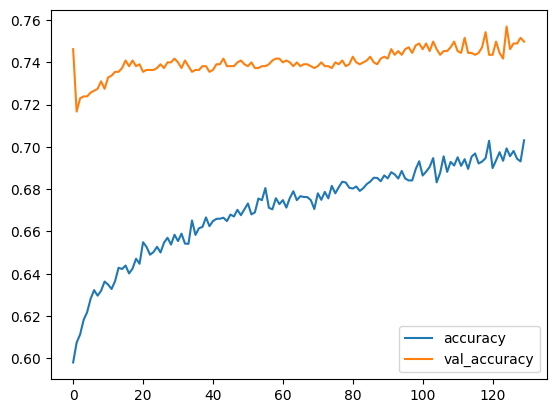

In [50]:
# plotting hasil akurasi
history_improve_df[['accuracy', 'val_accuracy']].plot()

<AxesSubplot: >

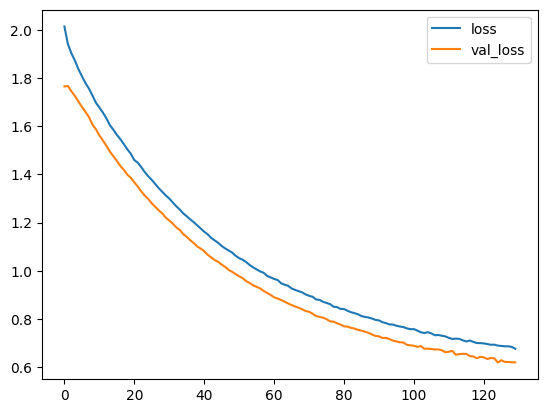

In [51]:
# ploting hasil loss 
history_improve_df[['loss', 'val_loss']].plot()

Dari grafik dapat kita lihat bahwa nilai akurasi dan loss pada model improvement ini sudah tidak terlihat problem exploding gradient, sehingga dapat dikatakan bahwa improvement pada model ini berhasil dengan menggunakan beberapa optimization `activation, kernel regularizer, kernel initializer, batchNormalization, dropout dan gradient clipping`. Namun hasil dari akurasi pada train set dan val set terjadi overfitting


In [52]:
y_seq_improve = seq_improve.predict(X_test)
y_seq_improve = np.where(y_seq_improve >= 0.5,1 ,0)


print(classification_report(y_test, y_seq_improve))

44/44 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1013
           1       0.53      0.76      0.62       386

    accuracy                           0.74      1399
   macro avg       0.71      0.75      0.71      1399
weighted avg       0.79      0.74      0.76      1399



Dari hasil predict menggunakan sequential model improvement, nilai classification report meningkat dibandingkan sequential base model, Baik pada `f1 score class 1 dan 0` masing-masing `0.82 dan 0.63` dan juga nilai accuracy yakni `0.76`

## Model Improvement (Functional)

In [53]:
# functional model Improvement
input_layer = Input(shape=(15,))
hidden1_layer = Dense(32, activation='relu', kernel_regularizer='l2', kernel_initializer='he_normal')(input_layer)
hidden2_layer = Dense(16, activation='relu', kernel_regularizer='l2', kernel_initializer='he_normal')(hidden1_layer)


concat_layer = concatenate([input_layer, hidden2_layer])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

func_improve = Model(inputs=input_layer, outputs=output_layer)

func_improve.compile(loss='binary_crossentropy',
                         optimizer=tf.keras.optimizers.SGD(clipvalue=1.0),
                         metrics=['accuracy'])

func_improve.summary()



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 15)]         0           []                               
                                                                                                  
 dense_11 (Dense)               (None, 32)           512         ['input_2[0][0]']                
                                                                                                  
 dense_12 (Dense)               (None, 16)           528         ['dense_11[0][0]']               
                                                                                                  
 concatenate_1 (Concatenate)    (None, 31)           0           ['input_2[0][0]',                
                                                                  'dense_12[0][0]']         

Improvement pada model functional kali ini bertujuan untuk menghilangkan exploding gradient. sehingga digunakan `activation='relu', kernel_regularizer='l2', kernel_initializer='he_normal'` pada hidden layer 1 dan hidden layer 2. dan juga dilakukan gradient clipping pada model compile

In [54]:
# Training model with 300 epochs
history_func_improve = func_improve.fit(pipe_train,
                                        epochs=500,
                                        validation_data=pipe_val,
                                        callbacks=[early_stopping])

Epoch 1/500
54/54 [==============================] - 1s 6ms/step - loss: 1.7006 - accuracy: 0.5772 - val_loss: 1.6166 - val_accuracy: 0.5925
Epoch 2/500
54/54 [==============================] - 0s 3ms/step - loss: 1.5248 - accuracy: 0.6981 - val_loss: 1.5578 - val_accuracy: 0.6497
Epoch 3/500
54/54 [==============================] - 0s 3ms/step - loss: 1.4663 - accuracy: 0.7283 - val_loss: 1.5354 - val_accuracy: 0.6693
Epoch 4/500
54/54 [==============================] - 0s 3ms/step - loss: 1.4375 - accuracy: 0.7372 - val_loss: 1.4177 - val_accuracy: 0.7194
Epoch 5/500
54/54 [==============================] - 0s 3ms/step - loss: 1.4002 - accuracy: 0.7426 - val_loss: 1.4406 - val_accuracy: 0.6971
Epoch 6/500
54/54 [==============================] - 0s 3ms/step - loss: 1.3755 - accuracy: 0.7459 - val_loss: 1.4110 - val_accuracy: 0.7015
Epoch 7/500
54/54 [==============================] - 0s 3ms/step - loss: 1.3544 - accuracy: 0.7477 - val_loss: 1.3692 - val_accuracy: 0.7105
Epoch 8/500
5

Pada training model kali ini digunakan 500 epochs dengan early stopping agar disaat model sudah mendekati goodfit maka training akan berhenti

In [55]:
# membuat data frame hasil training
history_func_improve_df = pd.DataFrame(history_func_improve.history)
history_func_improve_df

,loss,accuracy,val_loss,val_accuracy
0,1.700631,0.577229,1.616606,0.592493
1,1.524809,0.698064,1.557820,0.649687
2,1.466322,0.728310,1.535368,0.669348
3,1.437550,0.737241,1.417657,0.719392
4,1.400156,0.742645,1.440609,0.697051
...,...,...,...,...
118,0.563020,0.767412,0.574134,0.747096
119,0.561514,0.767412,0.572354,0.747096
120,0.557939,0.769814,0.588065,0.742627
121,0.559138,0.767187,0.586161,0.742627


<AxesSubplot: >

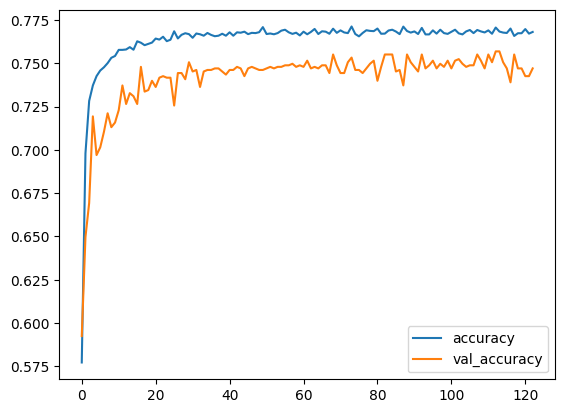

In [56]:
# Plot accuracy functional model improve
history_func_improve_df[['accuracy','val_accuracy']].plot()

<AxesSubplot: >

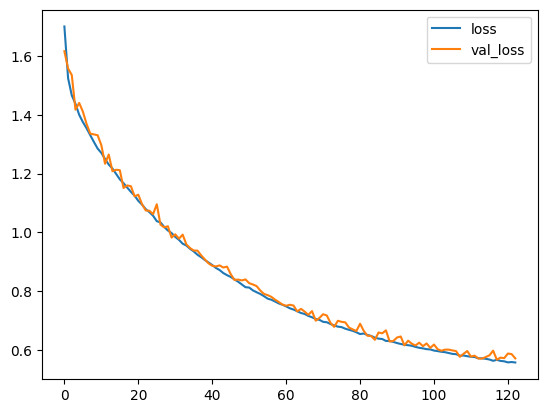

In [57]:
history_func_improve_df[['loss', 'val_loss']].plot()

Pada hasil training dengan model functional improve, baik nilai `akurasi maupun loss` sangat baik dan problem exploding gradient tidak terjadi lagi dan model sudah goodfit, hal ini menunjukkan improvement pada model ini sudah sangat baik.

In [58]:
y_func_improve = func_improve.predict(X_test)
y_func_improve = np.where(y_seq_improve >= 0.5,1 ,0)


print(classification_report(y_test, y_func_improve))

44/44 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1013
           1       0.53      0.76      0.62       386

    accuracy                           0.74      1399
   macro avg       0.71      0.75      0.71      1399
weighted avg       0.79      0.74      0.76      1399



Pada hasil metrics model `functional improve` memiliki nilai yang sama dengan `sequential improve` namun `perbedaan` kedua model ini adalah `functional lebih baik` dibandingkan sequential karena `functional model improvement tidak terjadi overfitting saat ditraining`

# 9. Model saving

In [59]:
# Save Pipeline

with open('final_pipeline.pkl', 'wb') as file_1:
  joblib.dump(final_pipeline, file_1)

# Freeze model
func_improve.trainable = False
# Save model
func_improve.save('churn_model.h5')

# 10. Model Inference

In [60]:
# see top 5 data inference
data_inf.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,Yes,1,No,No phone service,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Mailed check,33.60,33.60,No
1,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.95,79.95,Yes
2,Female,1,No,No,8,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.65,164.30,Yes
3,Male,0,No,Yes,31,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Credit card (automatic),25.00,789.20,No
4,Male,0,Yes,No,41,Yes,Yes,DSL,No,No,Yes,No,Yes,Yes,One year,Yes,Electronic check,73.00,3001.20,Yes


In [71]:
# Delete target
X_inf = data_inf.drop('Churn', axis=1)
y_inf = data_inf['Churn']
y_inf.reset_index(drop=True,inplace=True)

In [74]:
y_inf = y_inf.map({'Yes': 1, 'No': 0})


In [62]:
# transforming data using pipeline
data_inf_transform = final_pipeline.transform(data_inf)
data_inf_transform

array([[-1.29377004e+00, -1.06384160e+00,  1.70782368e-03,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         2.00000000e+00,  0.00000000e+00,  2.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  3.00000000e+00],
       [-1.29377004e+00,  5.13070779e-01,  7.05631202e-03,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  2.00000000e+00],
       [-1.00824496e+00, -1.53844630e+00,  1.67897531e-02,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  2.00000000e+00],
       [-7.00911160e-02, -1.35642944e+00,  8.88991461e-02,
         0.00000000e+00,  0.00000000e+00,  1.00000000

In [69]:
# Prediction using data inference
y_pred_inf = func_improve.predict(data_inf_transform)
y_pred_inf = np.where(y_pred_inf >= 0.5, 1, 0)
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['prediction'])

2/2 [==============================] - 0s 9ms/step


In [75]:
pd.concat([y_inf,y_pred_inf_df], axis=1)

,Churn,prediction
0,0,0
1,1,1
2,1,0
3,0,0
4,1,0
5,0,0
6,0,0
7,0,0
8,1,1
9,1,1


In [76]:
print(classification_report(y_inf,y_pred_inf))

              precision    recall  f1-score   support

           0       0.81      0.69      0.75        32
           1       0.57      0.72      0.63        18

    accuracy                           0.70        50
   macro avg       0.69      0.70      0.69        50
weighted avg       0.72      0.70      0.71        50



Meskipun sudah di improve model functional, jika digunakan pada data inference masi terdapat beberapa kesalahan prediksi setiap class sehingga accuracy yang didapatkan hanya 70%

# 11. Kesimpulan

# Model analysis
Pada kali ini digunakan 2 model yaitu sequential dan Functional

## 1. Base Model
- Base model sequential : <br>
pada base model sequential dibuat kerangka dengan 3 hidden layer masing-masing neuron berjumlah `64,32 dan 16` dengan optimizer `RMSprop` dengan metrics evaluasi adalah akurasi


- Base model Functional : <br>
pada base model functional dibuat kerangka dengan 2 hidden layer dan dilakukan concate antara input dan hidden layer ke-2, lalu optimizer yang digunakan adalah Adam dengan metrics evaluasi adalah akurasi 

pada 2 base model kali ini dilakukan training dengan menggunakan 20 epochs<br><br>

#### a. Evaluation<br> 

Hasil akurasi dan loss dari training base model sequential kurang baik, hal ini karena terdapat extreme exploding gradient pada validation set. Hal ini disebabkan karena model belum dilakukan optimization dan juga data pada validation set nya memiliki data yang `imbalance` lumayan jauh perbedaanya yaitu `28%:72%`

Pada hasil training base model functional memiliki masalah yang sama yaitu exploding gradient, namun tidak terlalu extreme dibandingkan dengan sequential. sehingga setelah ditest dengan Test-set hasil metrics classification report dari functional lebih baik dibandingkan dengan sequential
dengan hasil `f1 score` pada `class 1 maupun class 0`  masing-masing nilainya adalah `0.81 dan 0.63` dengan `akurasi` sebesar `0.75`<br>



## 2. Model improvement
- Sequential Improvement :<br>
Dari grafik dapat kita lihat bahwa nilai akurasi dan loss pada model sequential improvement sudah tidak terlihat problem exploding gradient, sehingga dapat dikatakan bahwa improvement pada model ini berhasil dengan menggunakan beberapa optimization `activation, kernel regularizer, kernel initializer, batchNormalization, dropout dan gradient clipping`. Namun hasil dari akurasi pada train set dan val set terjadi overfitting
- Functional Improvement :<br>
Improvement pada model functional kali ini bertujuan untuk menghilangkan exploding gradient. sehingga digunakan `activation='relu', kernel_regularizer='l2', kernel_initializer='he_normal'` pada hidden layer 1 dan hidden layer 2. dan juga dilakukan gradient clipping pada model compile

Jika dilihat dari hasil metrics classification report setelah dilakukan improvement kedua model mengalami kenaikan dibagian  `akurasi`


`Dari hasil training dapat dikatakan bahwa functional Improvement lebih baik dibandingkan sequential dikarenakan grafik akurasi dan loss menunjukkan goodfit dan juga tidak terdapat masalah exploding gradient`

# Overall Analysis

### Pada EDA didapatkan bahwa: 
- kolom churn memiliki komposisi yang tidak balance dengan perbandingan `73,46% No dan 26,54% Yes`
- Jumlah laki-laki dan perempuan hampir sama
- Terdapat 4 payment method : `Electronic Check, Mailed check, Bank Transfer dan Credit card` dengan bank transfer dan credit card memiliki total tagihan paling banyak
- Dari 3 jenis contract, two year memiliki totalCharges paling besar, dengan metode pembayaran electronic Check, dan Contract month-to-month memiliki nilai TotalCharges paling sedikit
- Terdapat 3 jenis langganan, yaitu multiple lines, tidak multiple lines dan multiple lines tanpa phone service, dari ketiga jenis tersebut yang paling banyak dipilih oleh customer adalah multiple lines tanpa phone service
- dari data numeric di data set ini, tidak terdapat outlier sehingga data aman digunakan, namun distribusi TotalCharges sedikit skewed jika dilihat dari nilai skewness

### Preprocessing:
Dilakukan feature engineering dengan melakukan hypotesis test menggunakan ANOVA (Numeric-categorical) dan Chi-Square (categorical-Categorical).
dari total 20 feature terdapat 5 feature yang tidak memiliki korelasi terhadap target, sehingga terdapat 15 feature tersisa yang akan digunakan untuk modeling.<br>
setelah didapatkan feature, dilakukan oversampled pada data train, dengan tujuan menyamakan jumlah data pada target hal ini dilakukan agar hasil dari training model lebih baik.

### Modeling 
Dilakukan definisi model dengan menggunakan sequential dan functional lalu dilakukan tuning/ improvement agar hasil dari prediksi model menjadi lebih baik. <br><br>

Hasil dari improvement menunjukkan bahwa `Model Functional Improvement` menjadi model yang terbaik untuk memprediksi Customer Churn pada perusahaan telco
dengan `nilai akurasi` sebesar `76%` dan `f1 score` antara `class 1 dan 0` masing masing adalah `63% dan 82%`

### Inference
Meskipun sudah di improve model functional, jika digunakan pada data inference masi terdapat beberapa kesalahan prediksi setiap class sehingga accuracy yang didapatkan hanya 70%